<a href="https://colab.research.google.com/github/radhikamodi05/tabularmodel_employee_attrition/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini Project Notebook: Employee Attrition Prediction

## Problem Statement

To predict employee attrition using CatBoost and XgBoost

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/wa_fn_usec_hr_employee_attrition_tsv.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


## Grading = 10 Points

### Install Required Dependencies

In [ ]:
# Install CatBoost
!pip -qq install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.3 MB/s eta 0:00:00


### Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt import fmin

Please refer to the [ReadMe](https://drive.google.com/file/d/1V5CAUlRwLNcQcIWfgCJhukYvRESi2cC2/view?usp=sharing) before proceeding further.

# Part-A

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [ ]:
# read the dataset
# YOUR CODE HERE
data = pd.read_csv('wa_fn_usec_hr_employee_attrition_tsv.csv')

In [ ]:
# Check the shape of dataframe.
# YOUR CODE HERE
data.shape

(1470, 35)

## Data Exploration

- Check for missing values
- Check for features having consistent data across samples
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:**
>Use `for` to iterate through each column.

>For statistical description display - samples count, missing values count, range, and data type of each feature.

In [ ]:
# YOUR CODE HERE
# print(data.head())
num_cols = list(data.describe().columns)
cat_cols = list(set(data.columns) - set(data.describe().columns))
print(num_cols, cat_cols)
data.info()
data.describe()

['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager'] ['educationfield', 'maritalstatus', 'overtime', 'attrition', 'gender', 'businesstravel', 'jobrole', 'over18', 'department']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3 

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

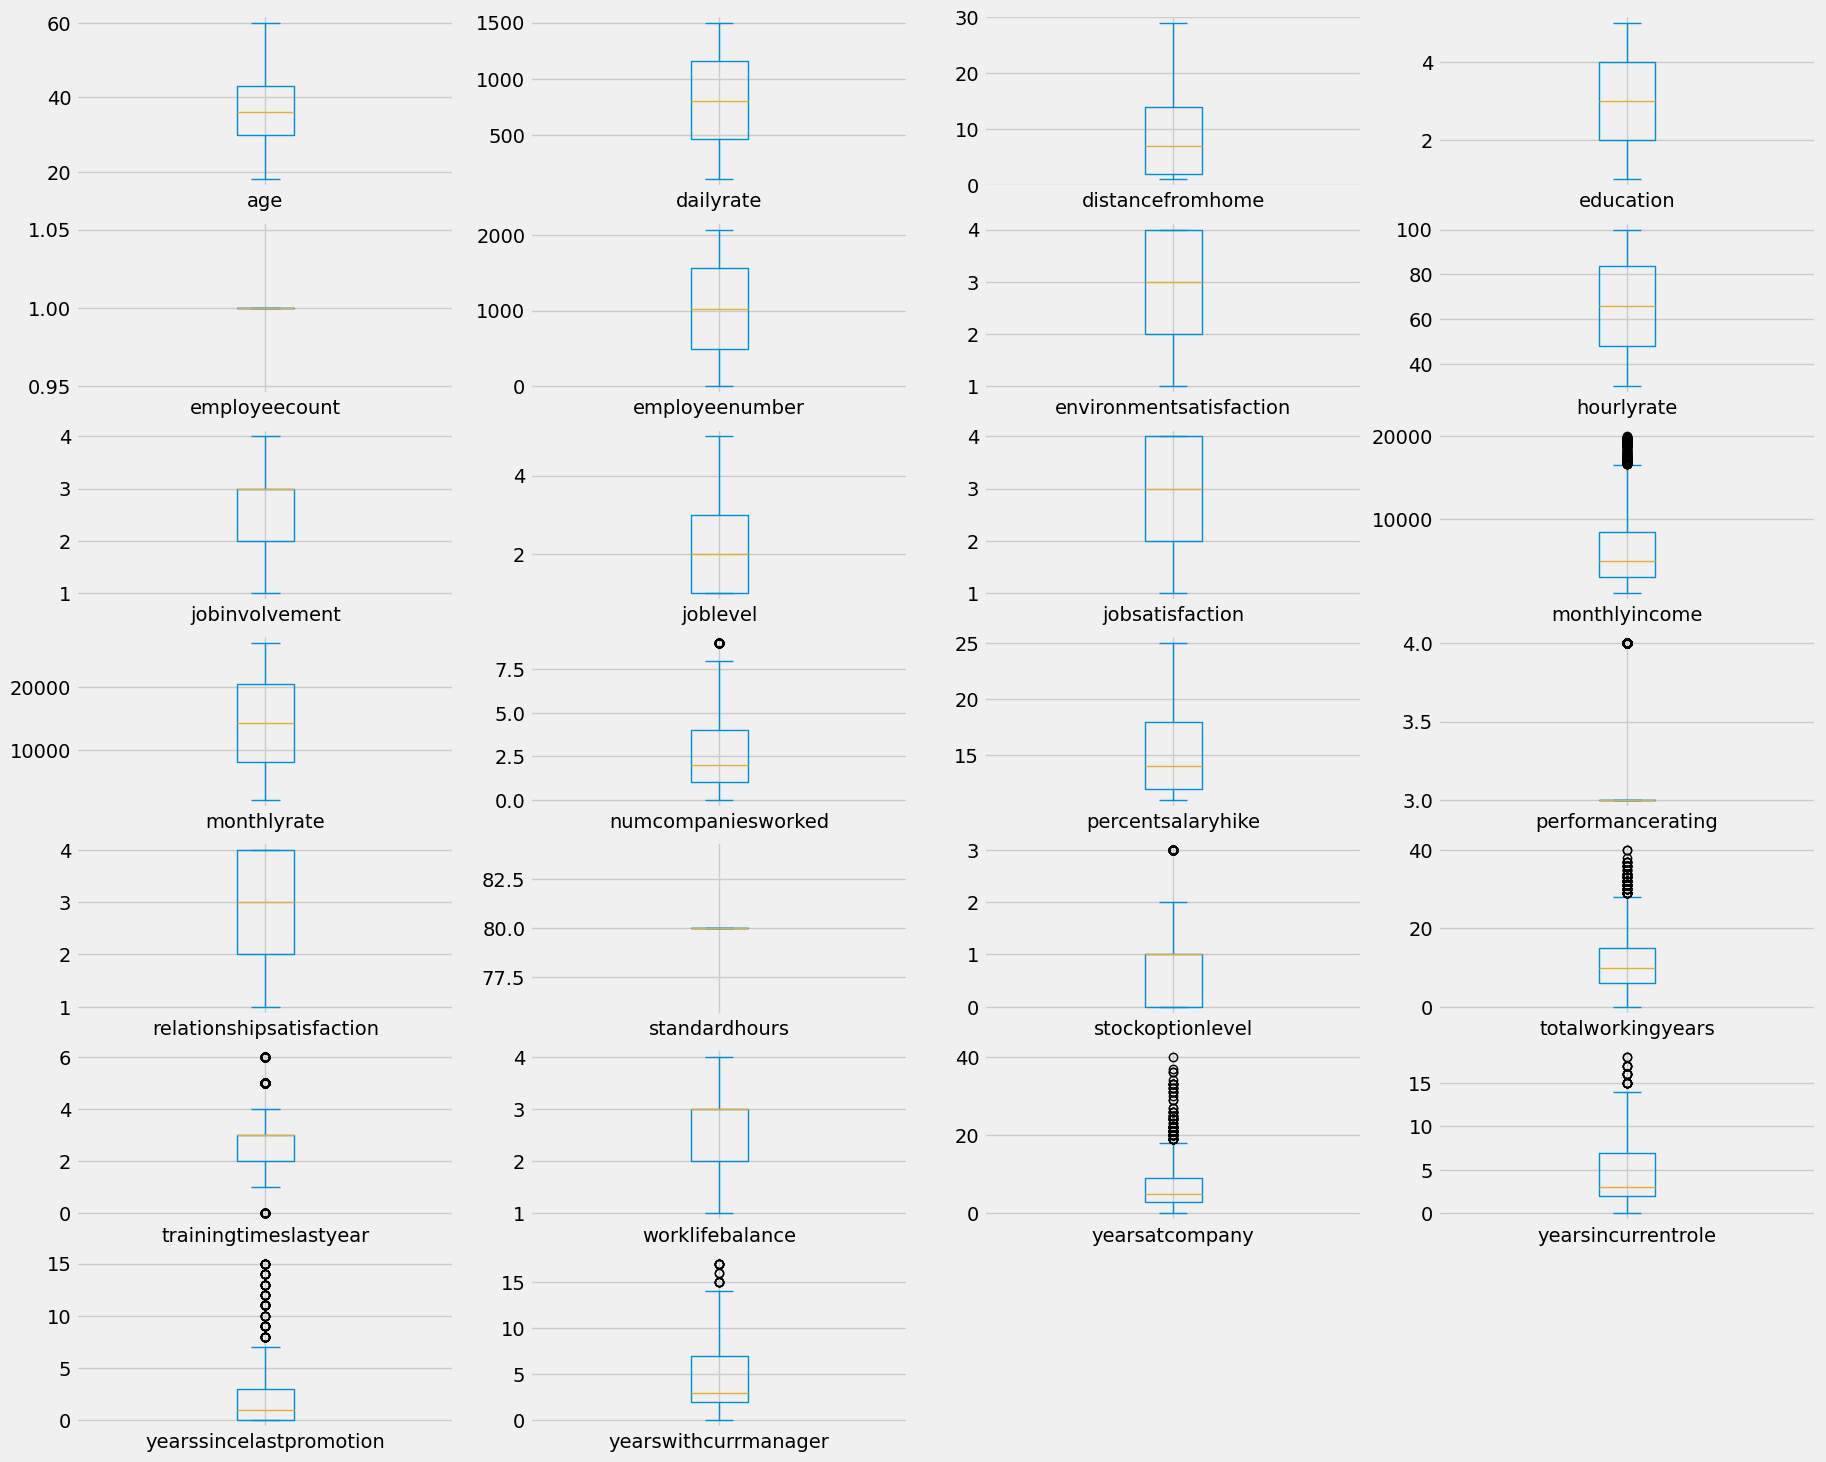

In [ ]:
# Check for outliers
# YOUR CODE HERE
num_data = data[num_cols]
num_data.plot(kind='box', subplots=True, layout=(8, 4), figsize=(20, 20))
plt.show()

### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [ ]:
# YOUR CODE HERE

outliers = set()
for col in num_data.columns:
    Q1 = num_data[col].quantile(0.25)
    Q3 = num_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Identify outliers based on upper and lower bounds
    outliers.update(num_data[(num_data[col] < lower) | (num_data[col] > upper)].index)
num_data.drop(outliers, axis=0)

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
5,32,1005,2,2,1,8,4,79,3,1,4,3068,11864,0,13,3,3,80,0,8,2,2,7,7,3,6
9,36,1299,27,3,1,13,3,94,3,2,3,5237,16577,6,13,3,2,80,2,17,3,2,7,7,7,7
11,29,153,15,2,1,15,4,49,2,2,3,4193,12682,0,12,3,4,80,0,10,3,3,9,5,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,325,5,3,1,2057,2,74,3,2,1,9936,3787,0,19,3,2,80,0,10,2,3,9,4,1,7
1464,26,1167,5,3,1,2060,4,30,2,1,3,2966,21378,0,18,3,4,80,0,5,2,3,4,2,0,0
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


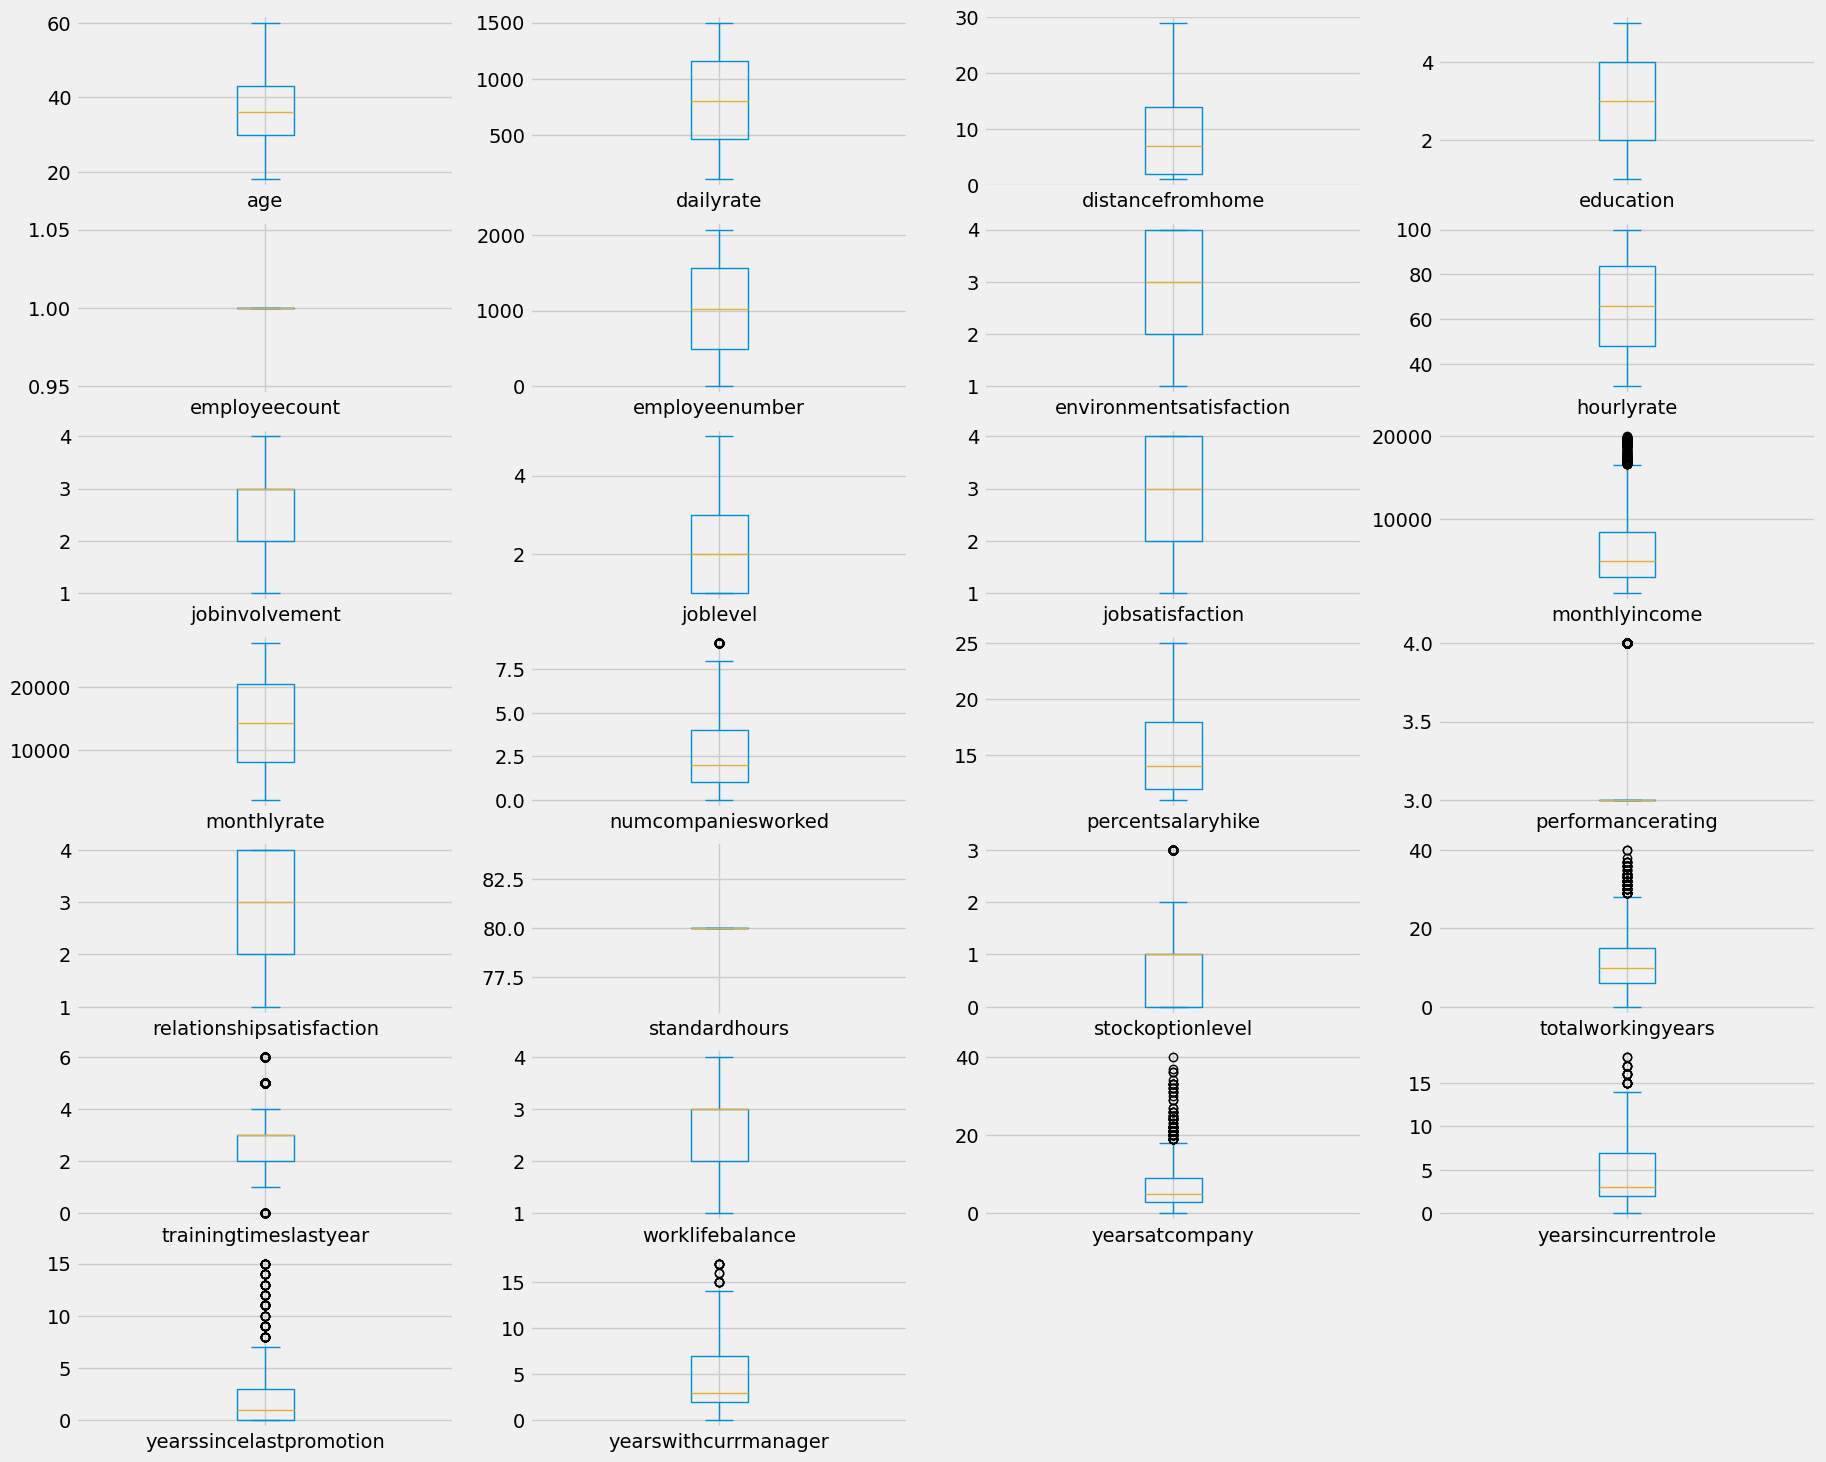

In [ ]:
# Recheck for outliers
# YOUR CODE HERE
num_data.plot(kind='box', subplots=True, layout=(8, 4), figsize=(20, 20))
plt.show()

### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [ ]:
# Count of unique values in Attrition column
# YOUR CODE HERE
data['attrition'].value_counts()

attrition
No     1233
Yes     237
Name: count, dtype: int64

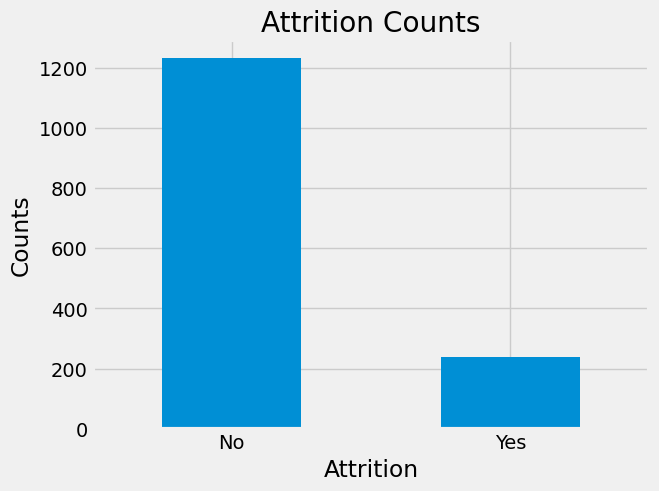

In [ ]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE
attrition_counts = data['attrition'].value_counts()

# Plot the bar chart
attrition_counts.plot(kind='bar')

plt.title('Attrition Counts')
plt.xlabel('Attrition')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally
plt.show()

If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

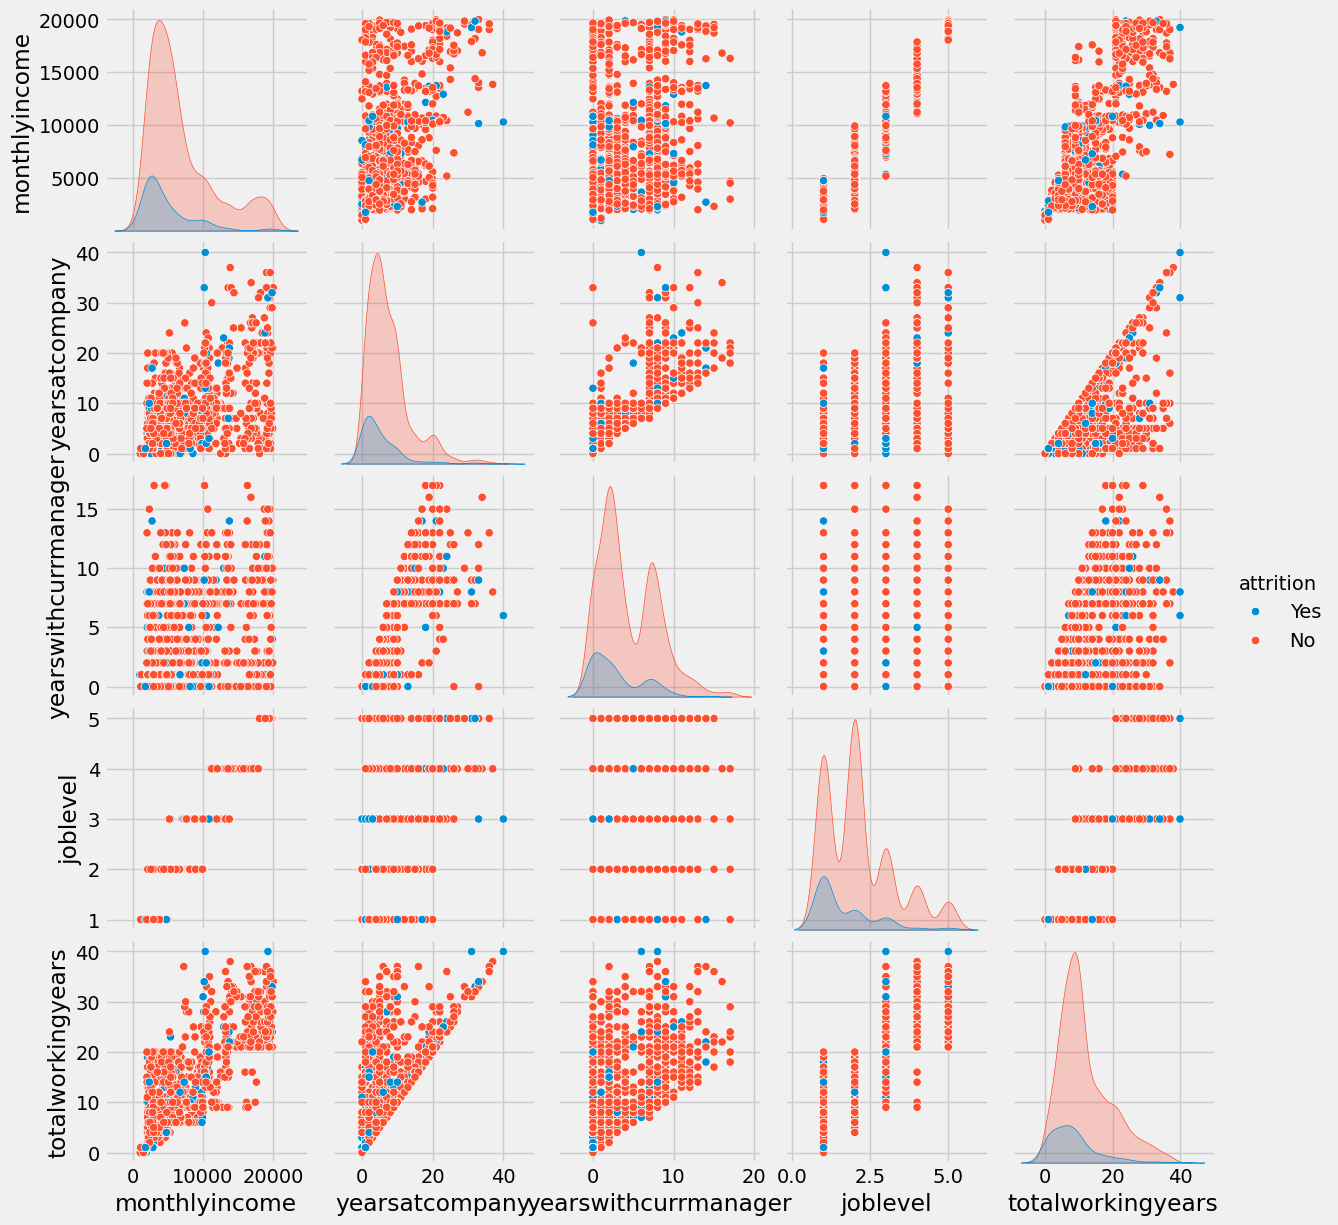

In [ ]:
# Visualize a pairplot with relevant features
# YOUR CODE HERE
features = ['monthlyincome', 'attrition', 'yearsatcompany', 'yearswithcurrmanager', 'joblevel', 'totalworkingyears']
pairplot = sns.pairplot(data[features], hue ='attrition')
# to show
plt.show()

### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

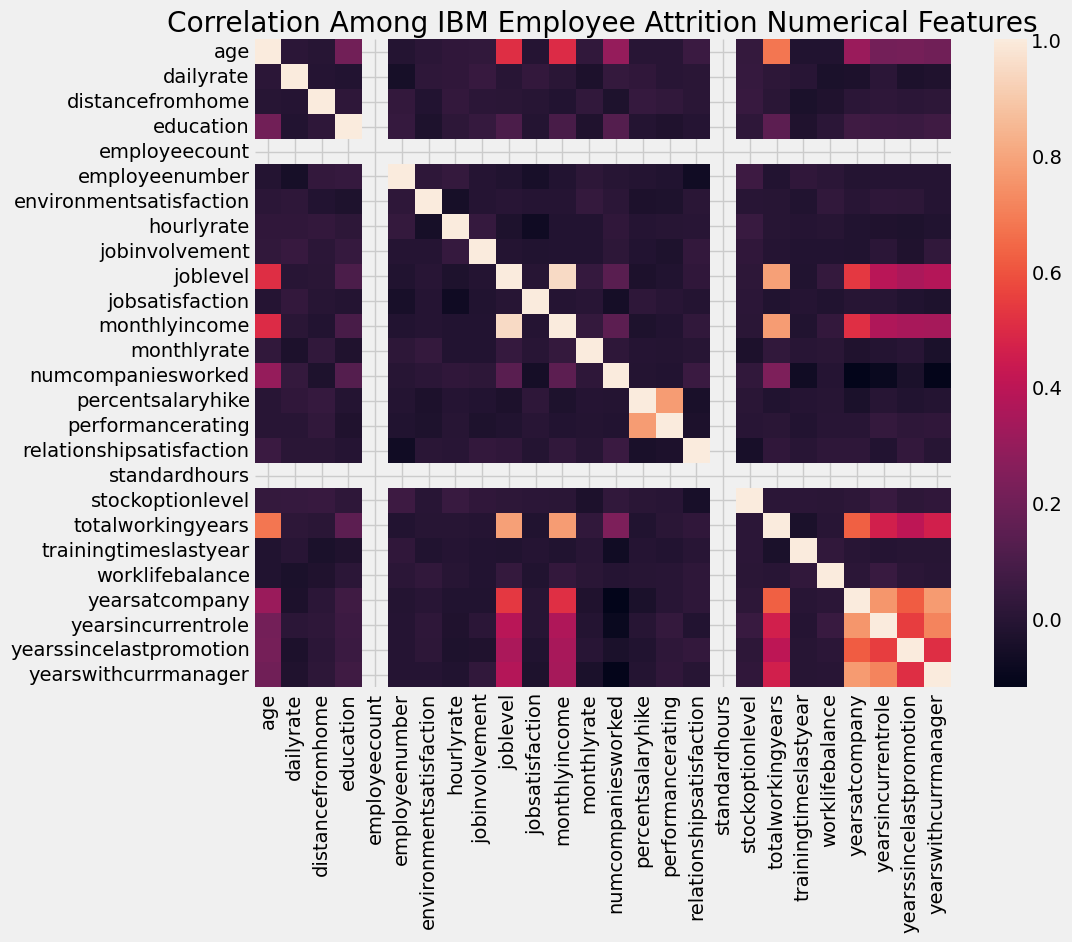

In [ ]:
# Visualize heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(data.loc[:, num_cols].corr())
plt.title('Correlation Among IBM Employee Attrition Numerical Features')
plt.show()

Comment on the observations made with the pairplot and heatmap

# Part-B

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [ ]:
cbo_data = data.copy()
cbo_data.shape

(1470, 35)

In [ ]:
# Handling categorical features in train set
cbo_dummy = pd.get_dummies(cbo_data[cat_cols], drop_first=True)
cbo_dummy.head()

,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,maritalstatus_Married,maritalstatus_Single,overtime_Yes,attrition_Yes,gender_Male,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,department_Research & Development,department_Sales
0,True,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,True,False,False,True
1,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False
2,False,False,False,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False,False,False,True,False
3,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False
4,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False


In [ ]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
cbo_data = pd.concat([cbo_data, cbo_dummy], axis=1)
cbo_data.drop(columns = cat_cols, inplace=True)
cbo_data.head(5)

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,maritalstatus_Married,maritalstatus_Single,overtime_Yes,attrition_Yes,gender_Male,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,department_Research & Development,department_Sales
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,True,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,True,False,False,True
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,False,False,False,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False,False,False,True,False
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False


In [ ]:
# Rename target column
cbo_data.rename(columns={'attrition_Yes': 'attrition'}, inplace=True)
cbo_data.head()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,maritalstatus_Married,maritalstatus_Single,overtime_Yes,attrition,gender_Male,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,department_Research & Development,department_Sales
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,True,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,True,False,False,True
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,False,False,False,True,False,False,True,True,True,True,False,True,False,True,False,False,False,False,False,False,True,False
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False


In [ ]:
cbo_data = cbo_data.T.drop_duplicates().T

In [ ]:
cbo_data = cbo_data.astype('int')

In [ ]:
# YOUR CODE HERE
train_ibm_df, test_ibm_df = train_test_split(cbo_data,
                                             test_size = 0.05,
                                             stratify = data['attrition'],
                                             random_state = 123)
train_ibm_df.shape, test_ibm_df.shape

((1396, 48), (74, 48))

In [ ]:
# Check the distribution of the class labels
print("Attrition train")
print(train_ibm_df['attrition'].value_counts()/len(train_ibm_df))
print("Attrition test")
print(test_ibm_df['attrition'].value_counts()/len(test_ibm_df))

Attrition train
attrition
0    0.838825
1    0.161175
Name: count, dtype: float64
Attrition test
attrition
0    0.837838
1    0.162162
Name: count, dtype: float64


In [ ]:
test_ibm_df.head()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,maritalstatus_Married,maritalstatus_Single,overtime_Yes,attrition,gender_Male,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,department_Research & Development,department_Sales
1294,41,447,5,3,1,1814,2,85,4,2,2,6870,15530,3,12,3,1,80,0,11,3,1,3,2,1,2,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False
634,25,141,3,1,1,879,3,98,3,2,1,4194,14363,1,18,3,4,80,0,5,3,3,5,3,0,3,False,False,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,True,False,False,True
60,32,427,1,3,1,78,1,33,3,2,4,6162,10877,1,22,4,2,80,1,9,3,3,9,8,7,8,False,False,True,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3,True,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False
424,57,210,29,3,1,568,1,56,2,4,4,14118,22102,3,12,3,3,80,1,32,3,2,1,0,0,0,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True


In [ ]:
# Features
test_x = test_ibm_df.drop('attrition', axis=1)

# Target label
test_y = test_ibm_df['attrition']
test_y
test_x.shape, test_y.shape

((74, 47), (74,))

In [ ]:
test_y = test_y.astype('int')
test_x = test_x.astype('int')

In [ ]:
def org_results(trials, hyperparams, model_name):
    fit_idx = -1
    for idx, fit  in enumerate(trials):
        hyp = fit['misc']['vals']
        xgb_hyp = {key:[val] for key, val in hyperparams.items()}
        if hyp == xgb_hyp:
            fit_idx = idx
            break

    train_time = str(trials[-1]['refresh_time'] - trials[0]['book_time'])
    acc = round(trials[fit_idx]['result']['accuracy'], 3)
    F1 = round(trials[fit_idx]['result']['f1 score'], 3)
    train_auc = round(trials[fit_idx]['result']['train auc'], 3)
    test_auc = round(trials[fit_idx]['result']['test auc'], 3)

    results = {
        'model': model_name,
        'parameter search time': train_time,
        'accuracy': acc,
        'f1_score': F1,
        'test auc score': test_auc,
        'training auc score': train_auc,
        'parameters': hyperparams
    }
    return results

Optional:
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters.

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance.

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

In [ ]:
# Feature Space
x_df = train_ibm_df.drop('attrition', axis=1)

# Target label
y_df = train_ibm_df['attrition']

x_df.shape, y_df.shape

((1396, 47), (1396,))

In [ ]:
y_df = y_df.astype('int')

In [ ]:
x_df = x_df.astype('int')

### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# def cat_objective(space):

#     cboost = CatBoostClassifier(
#     eval_metric  = 'AUC',
#     learning_rate = space['learning_rate'],
#     iterations = space['iterations'],
#     depth = space['depth'],
#     l2_leaf_reg = space['l2_leaf_reg'],
#     border_count = space['border_count']
#     )

#     cboost.fit(x_df, y_df,
#             cat_features=None)

#     predictions = cboost.predict(test_x)
#     test_preds = cboost.predict_proba(test_x)[:,1]
#     train_preds = cboost.predict_proba(x_df)[:,1]

#     train_auc = roc_auc_score(y_df, train_preds)
#     test_auc = roc_auc_score(test_y, test_preds)
#     accuracy = accuracy_score(test_y, predictions)
#     F1 = f1_score(test_y, predictions)

#     return {'status': STATUS_OK, 'loss': 1-test_auc, 'accuracy': accuracy,
#             'test auc': test_auc, 'train auc': train_auc, 'f1 score': F1}

In [ ]:
# trials = Trials()
# space = {
#     'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.3)),
#     'iterations': hp.quniform('iterations', 25, 1000, 25),
#     'depth': hp.quniform('depth', 1, 16, 1),
#     'border_count': hp.quniform('border_count', 30, 220, 5),
#     'l2_leaf_reg': hp.quniform('l2_leaf_reg', 1, 10, 1)
# }

# cboost_hyperparams = fmin(fn = cat_objective,
#                  max_evals = 150,
#                  trials = trials,
#                  algo = tpe.suggest,
#                  space = space
#                  )

# cbo_results = org_results(trials.trials, cboost_hyperparams, 'CatBoost')
# display(cbo_results)

In [ ]:
# Create CatBoost model
# YOUR CODE HERE
cboost = CatBoostClassifier(learning_rate = 1,
                            depth = 1,
                            scale_pos_weight = 6,
                            l2_leaf_reg = 8,
                            border_count = 65)

In [ ]:
# Model training
cboost.fit(x_df, y_df, cat_features = None)

0:	learn: 0.6545709	total: 51.8ms	remaining: 51.7s
1:	learn: 0.6249790	total: 52.7ms	remaining: 26.3s
2:	learn: 0.5844728	total: 54.3ms	remaining: 18s
3:	learn: 0.5721941	total: 56.4ms	remaining: 14s
4:	learn: 0.5698581	total: 58.3ms	remaining: 11.6s
5:	learn: 0.5558421	total: 64.6ms	remaining: 10.7s
6:	learn: 0.5499384	total: 65.9ms	remaining: 9.34s
7:	learn: 0.5350069	total: 66.8ms	remaining: 8.29s
8:	learn: 0.5245805	total: 68.4ms	remaining: 7.53s
9:	learn: 0.5156086	total: 70.6ms	remaining: 6.99s
10:	learn: 0.5063587	total: 72.2ms	remaining: 6.49s
11:	learn: 0.5003012	total: 77.9ms	remaining: 6.42s
12:	learn: 0.4939574	total: 80.3ms	remaining: 6.1s
13:	learn: 0.4871826	total: 82.4ms	remaining: 5.8s
14:	learn: 0.4805310	total: 83.9ms	remaining: 5.51s
15:	learn: 0.4742883	total: 85.3ms	remaining: 5.25s
16:	learn: 0.4682639	total: 86.8ms	remaining: 5.02s
17:	learn: 0.4638584	total: 88.3ms	remaining: 4.82s
18:	learn: 0.4585944	total: 89.8ms	remaining: 4.64s
19:	learn: 0.4537358	total: 

### Model performance

In [ ]:
# Model performance on all sets
predictions = cboost.predict(test_x)
test_preds = cboost.predict_proba(test_x)[:,1]
train_preds = cboost.predict_proba(x_df)[:,1]

train_auc = roc_auc_score(y_df, train_preds)
test_auc = roc_auc_score(test_y, test_preds)
accuracy = accuracy_score(test_y, predictions)

In [ ]:
F1 = f1_score(test_y, predictions)
print(F1)

0.6153846153846153


Confusion Matrix

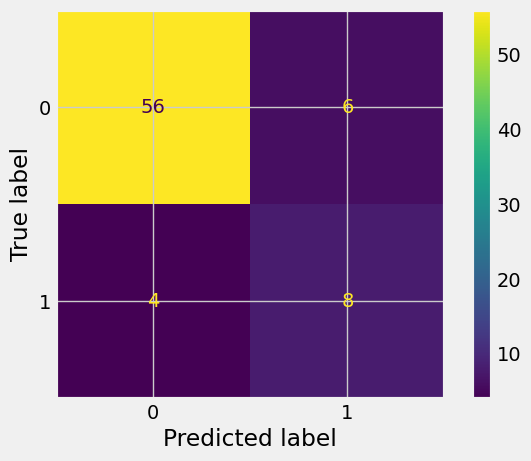

In [ ]:
cm = confusion_matrix(test_y, predictions, labels=cboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=cboost.classes_)
disp.plot()
plt.show()

Feature Importance

In [ ]:
features = x_df.columns
importances_cboost = cboost.feature_importances_

In [ ]:
cboost_results = {'accuracy': accuracy,
                  'model': 'CatBoost',
                  'f1_score': F1,
                  'training auc score': train_auc,
                  'test auc score': test_auc}
cboost_results

{'accuracy': 0.8648648648648649,
 'model': 'CatBoost',
 'f1_score': 0.6153846153846153,
 'training auc score': 0.9875396147642092,
 'test auc score': 0.8615591397849462}

K-fold cross validaton

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)

In [ ]:
for k, (train, test) in enumerate(kfold.split(x_df, y_df)):
    cboost.fit(x_df.iloc[train], y_df.iloc[train])
    print(f'iteration number = {k+1}')
    print(f'Training Accuracy = {cboost.score(x_df.iloc[train], y_df.iloc[train])}')
    print(f'Test Accuracy = {cboost.score(x_df.iloc[test], y_df.iloc[test])}')
    print(f'f1 score = {f1_score(test_y, predictions)}')

Streaming output truncated to the last 5000 lines.
20:	learn: 0.4437174	total: 20.7ms	remaining: 963ms
21:	learn: 0.4405478	total: 21.6ms	remaining: 959ms
22:	learn: 0.4374964	total: 22.5ms	remaining: 958ms
23:	learn: 0.4344038	total: 23.5ms	remaining: 957ms
24:	learn: 0.4313610	total: 24.5ms	remaining: 954ms
25:	learn: 0.4289058	total: 26.3ms	remaining: 984ms
26:	learn: 0.4241690	total: 28.3ms	remaining: 1.02s
27:	learn: 0.4191937	total: 29.7ms	remaining: 1.03s
28:	learn: 0.4153260	total: 33ms	remaining: 1.1s
29:	learn: 0.4118315	total: 34.4ms	remaining: 1.11s
30:	learn: 0.4088637	total: 36.4ms	remaining: 1.14s
31:	learn: 0.4062229	total: 37.3ms	remaining: 1.13s
32:	learn: 0.4036794	total: 38.2ms	remaining: 1.12s
33:	learn: 0.4012927	total: 39.8ms	remaining: 1.13s
34:	learn: 0.3984723	total: 40.8ms	remaining: 1.12s
35:	learn: 0.3960818	total: 41.7ms	remaining: 1.11s
36:	learn: 0.3932775	total: 42.5ms	remaining: 1.1s
37:	learn: 0.3913247	total: 43.4ms	remaining: 1.1s
38:	learn: 0.38933

## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

In [ ]:
# Copy dataframe
# YOUR CODE HERE

**Hint:** Use pd.get_dummies

In [ ]:
# Handling categorical features
# YOUR CODE HERE

In [ ]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

In [ ]:
# Rename target column
# YOUR CODE HERE

In [ ]:
# Feature Space
# YOUR CODE HERE

# Targer label
# YOUR CODE HERE

### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# def xgb_objective(space):

#     model = XGBClassifier(
#         learning_rate = space['learning_rate'],
#         n_estimators = int(space['n_estimators']),
#         max_depth = int(space['max_depth']),
#         min_child_weight = space['m_child_weight'],
#         gamma = space['gamma'],
#         subsample = space['subsample'],
#         scale_pos_weight = 6,
#         colsample_bytree = space['colsample_bytree'],
#         objective = 'binary:logistic'
#     )

#     model.fit(x_df, y_df)

#     predictions = model.predict(test_x)
#     test_preds = model.predict_proba(test_x)[:,1]
#     train_preds = model.predict_proba(x_df)[:,1]

#     xgb_booster = model.get_booster()
#     train_auc = roc_auc_score(y_df, train_preds)
#     test_auc = roc_auc_score(test_y, test_preds)
#     accuracy = accuracy_score(test_y, predictions)
#     F1 = f1_score(test_y, predictions)

#     return {'status': STATUS_OK, 'loss': 1-test_auc, 'accuracy': accuracy,
#             'test auc': test_auc, 'train auc': train_auc, 'f1 score': F1
#            }

In [ ]:
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 1000, 25),
    'max_depth': hp.quniform('max_depth', 1, 12, 1),
    'm_child_weight': hp.quniform('m_child_weight', 1, 6, 1),
    'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'learning_rate': hp.loguniform('learning_rate', np.log(.001), np.log(.3)),
    'colsample_bytree': hp.quniform('colsample_bytree', .5, 1, .1)
}

In [ ]:
trials = Trials()

In [ ]:
# xgb_results = org_results(trials.trials, xgb_hyperparams, 'XGBoost')
# display(xgb_results)

In [ ]:
# Create XGBoost classifier model
xgb_model = XGBClassifier(
    learning_rate = 0.14972574734435318,
    n_estimators = 200,
    max_depth = 1,
    min_child_weight = 6,
    gamma = 0.5,
    subsample = 0.55,
    colsample_bytree = 1,
    scale_pos_weight = 6,
    objective = 'binary:logistic'
)

In [ ]:
# Model training
xgb_model.fit(x_df, y_df)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.14972574734435318, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Model Performance

In [ ]:
# Model performance on all sets
predictions = xgb_model.predict(test_x)
test_preds = xgb_model.predict_proba(test_x)[:,1]
train_preds = xgb_model.predict_proba(x_df)[:,1]

xgb_booster = xgb_model.get_booster()

train_auc = roc_auc_score(y_df, train_preds)
test_auc = roc_auc_score(test_y, test_preds)
accuracy = accuracy_score(test_y, predictions)

In [ ]:
F1 = f1_score(test_y, predictions)
print(F1)

0.611111111111111


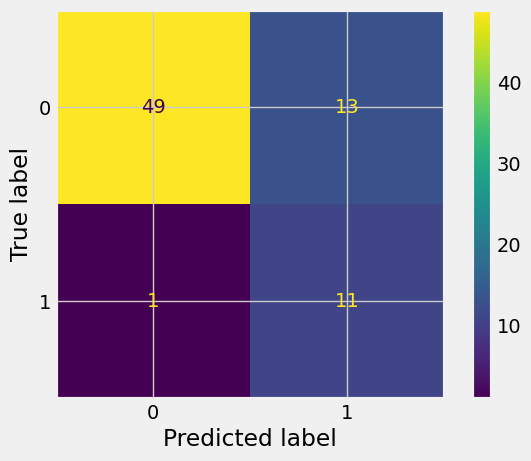

In [ ]:
cm = confusion_matrix(test_y, predictions, labels=cboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=cboost.classes_)
disp.plot()
plt.show()

In [ ]:
features = x_df.columns
importances_xgboost = xgb_model.feature_importances_

In [ ]:
xgb_results = {'accuracy': accuracy,
              'model': 'XGBoost',
              'f1_score': F1,
              'test auc score': test_auc,
              'training auc score': train_auc}
xgb_results

{'accuracy': 0.8108108108108109,
 'model': 'XGBoost',
 'f1_score': 0.611111111111111,
 'test auc score': 0.924731182795699,
 'training auc score': 0.9106139102381628}

## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [ ]:
## Following the same procedure as followed in XGBoost

# Copy the dataframe
# YOUR CODE HERE

# Handling categorical features
# YOUR CODE HERE

# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

# Rename target column
# YOUR CODE HERE

# Features Space
# YOUR CODE HERE

# Target Label
# YOUR CODE HERE

### Model Definition

**Hint:**
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create LightGBM classifier model
# YOUR CODE HERE

In [ ]:
# Model training
# YOUR CODE HERE

### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE

## Results

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

In [ ]:
# Create a dataframe for computed metrics for different models
final_results = pd.DataFrame([xgb_results, cboost_results])
display(final_results)

,accuracy,model,f1_score,test auc score,training auc score
0,0.810811,XGBoost,0.611111,0.924731,0.910614
1,0.864865,CatBoost,0.615385,0.861559,0.987540


Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/